In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random 

In [2]:
data =  pd.read_csv('P1grupo_9.csv')
data

,x,y
0,0.016,0.118485
1,0.016,0.118485
2,0.022,5.866850
3,0.040,0.940516
4,0.052,0.297763
...,...,...
995,9.974,39.638106
996,9.977,32.935843
997,9.978,34.187592
998,9.989,31.194713


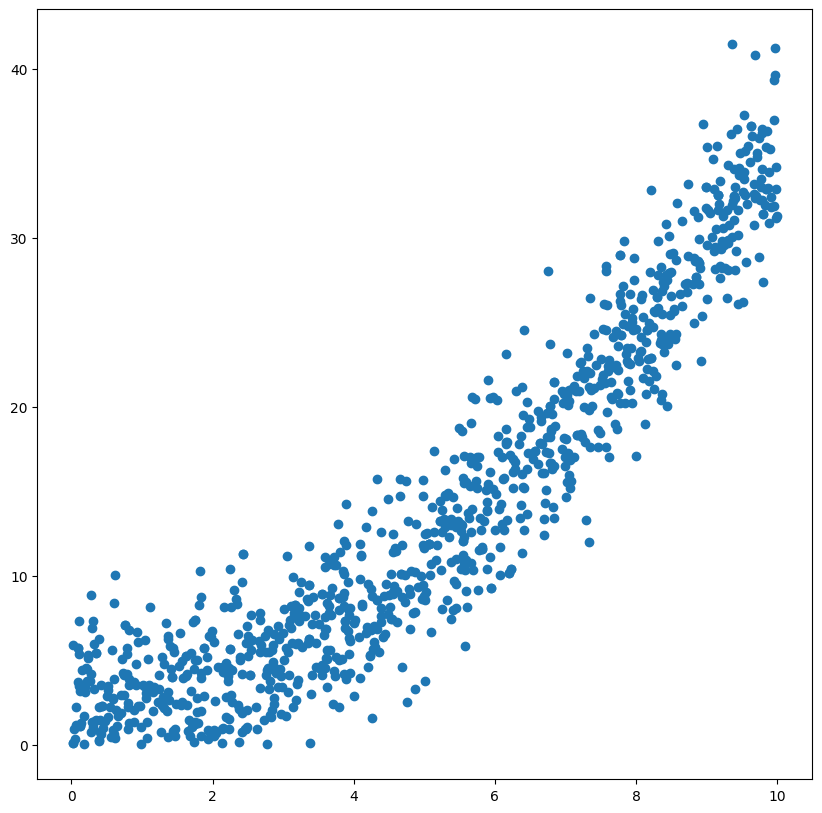

In [3]:
fig, ax = plt.subplots(1,1 , figsize = (10,10))
ax.scatter(data['x'], data['y'], marker= 'o')


In [4]:
x= data['x']
x = np.array(x)


In [5]:
poly = PolynomialFeatures(degree=1)
x = x.reshape(-1,1)
z = poly.fit_transform(x)
z

array([[1.   , 0.016],
       [1.   , 0.016],
       [1.   , 0.022],
       ...,
       [1.   , 9.978],
       [1.   , 9.989],
       [1.   , 9.999]])

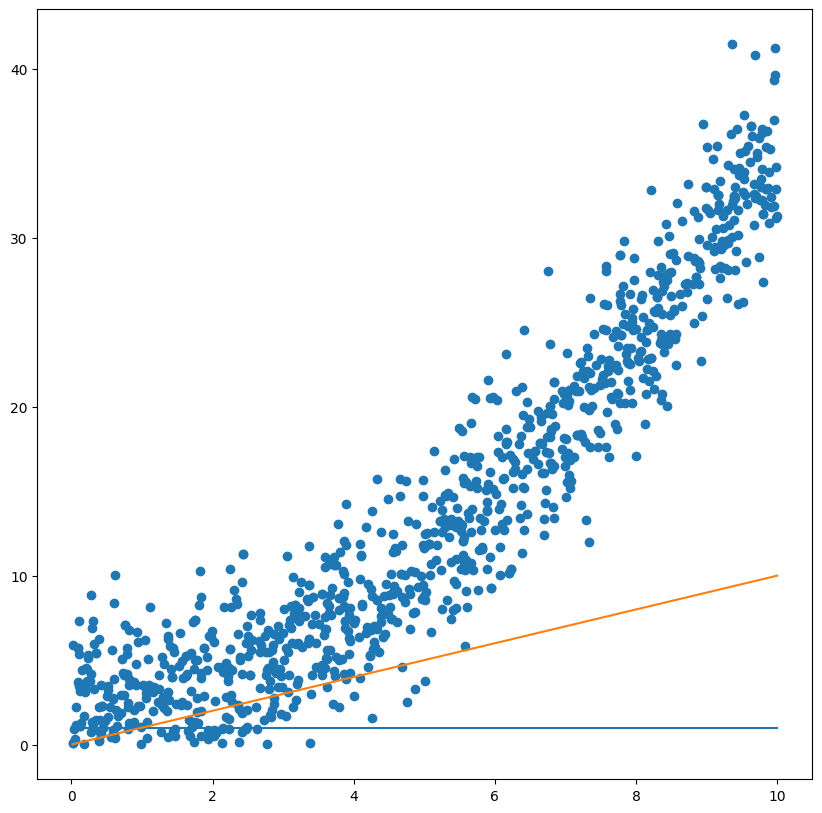

In [6]:
fig, ax = plt.subplots(1,1 , figsize = (10,10))
ax.scatter(data['x'], data['y'], marker= 'o')
ax.plot(data['x'], z)

In [7]:
import math
exp = math.e
data_2 = pd.read_csv('P2grupo_9.csv')

(a) Considere la funci ́on de activacion sigmoide y encuentre una expresion para su derivada σ′(t).

$\sigma$(t) = 1/(1 + $e^{-t}$)  

$\sigma$'(t) = -$(u)^{-2}$ $\cdot$ u'
 
$\sigma$'(t) = -(1 + $e^{-t})^{-2}$ $\cdot$ -$e^{-t}$ 

(b) Considerando los datos de entrenamiento (ui, vi, wi, zi) ∈ R4 construya J = J(a, b, c, d, e, f ) la
funci ́on de p ́erdida del error cuadr ́atico medio, como vimos en el ejemplo del curso, y calcule
expl ́ıcitamente su gradiente en un punto cualquiera (a, b, c, d, e, f ) ∈ R6

Para este ejercicio definieremos $\beta$ = $ax_i¹+bx_i²+cx_i³+e$ y definiremos $\alpha$ = d $\cdot$ σ($\beta$)+f

$j(n) = \frac{1}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha))^2$

$ja(n) = \frac{2d}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha)) \cdot σ' (\alpha) \cdot σ\prime(\beta) \cdot x_i¹$

$jb(n) = \frac{2d}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha)) \cdot σ\prime(\alpha)\cdot σ\prime(\beta) \cdot x_i²$

$jc(n) = \frac{2d}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha)) \cdot σ\prime(\alpha) \cdot σ\prime(\beta) \cdot x_i³$

$jd(n) = \frac{2d}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha)) \cdot σ\prime(\alpha) \cdot σ\prime(\beta)$

$je(n) = \frac{2d}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha)) \cdot σ\prime(\alpha) \cdot σ\prime(\beta)$

$jf(n) = \frac{2d}{n} \sum_{i=1}^{n} (Z_i-σ(\alpha)) \cdot σ\prime(\alpha)$

(c) Inicialice los pesos y sesgos de esta Red Neuronal asign ́andole valores en el intervalo [−5, 5] a
los par ́ametros a0, b0, c0, d0, e0, f0 y calcule J(a0, b0, c0, d0, e0, f0).

In [8]:
a = random.uniform(-5,5)
b = random.uniform(-5,5)
c = random.uniform(-5,5)
d = random.uniform(-5,5)
e = random.uniform(-5,5)
f = random.uniform(-5,5)

In [9]:
k  = 0.1


In [10]:
Z = data_2['0.0']
X1 = data_2['2.383899827355215']
X2 = data_2['-2.800829303567145']
X3 = data_2['4.681703914136946']

Vamos a definir sigma y y la derivada de sigma para poder trabajar.

In [11]:
def sigma(t):
    return (1 + exp**(-t)) **(-1)

def der_sigma(t):
    return (exp**-t) * ((sigma(t)) ** 2)

Vamos a deifnir cada derivada

In [12]:
def derivada_a(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        suma = ( sigma(alpha) - Z[n])
        suma *= der_sigma(alpha)
        suma *= der_sigma(beta)
        suma *= X1[n]
        suma_t += suma
    ja = (2*d) / 999
    ja *= suma_t
    return ja

In [13]:
def derivada_b(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        suma = ( sigma(alpha) - Z[n])
        suma *= der_sigma(alpha)
        suma *= der_sigma(beta)
        suma *= X2[n]
        suma_t += suma
    jb = (2*d) / 999
    jb *= suma_t
    return jb

In [14]:
def derivada_c(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        suma = ( sigma(alpha) - Z[n])
        suma *= der_sigma(alpha)
        suma *= der_sigma(beta)
        suma *= X3[n]
        suma_t += suma
    jc = (2*d) / 999
    jc *= suma_t
    return jc

In [15]:
def derivada_d(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        suma = ( sigma(alpha) - Z[n])
        suma *= der_sigma(alpha)
        suma *= sigma(beta)
        suma_t += suma
    jd = (2) / 999
    jd *= suma_t
    return jd


In [16]:
def derivada_e(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        suma = ( sigma(alpha) - Z[n])
        suma *= der_sigma(alpha)
        suma *= der_sigma(beta)
        suma_t += suma
    je = (2*d) / 999
    je *= suma_t
    return je

In [17]:
def derivada_f(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        suma = ( sigma(alpha) - Z[n])
        suma *= der_sigma(alpha)
        suma_t += suma
    jf = (2*d) / 999
    jf *= suma_t
    return jf

d) Para la b ́usqueda de un m ́ınimo programe un algoritmo de descenso del gradiente
(ak+1, bk+1, ck+1, dk+1, ek+1, fk+1)T = (ak, bk, ck, dk, ek, fk)T − ε∇J(ak, bk, ck, dk, ek, fk)
con un paso fijo ε = 0, 1 y genere 2000 iteraciones. Muestre con un gr ́afico la evoluci ́on del error
J usando los datos generados.

In [18]:
def J(a,b,c,d,e,f):
    suma_t = 0
    for n in range(999):
        beta = a*X1[n] + b*X2[n] + c*X3[n] + e
        alpha = d* sigma(beta) + f
        ss = ( -sigma(alpha) + Z[n]) ** 2
        suma_t += ss
    return suma_t/999

In [19]:
def descenso(a, b, c, d, e, f):
    a = a - k * derivada_a(a,b,c,d,e,f)
    b = b - k * derivada_b(a,b,c,d,e,f)
    c = c - k * derivada_c(a,b,c,d,e,f)
    d = d - k * derivada_d(a,b,c,d,e,f)
    e = e - k * derivada_e(a,b,c,d,e,f)
    f = f - k * derivada_f(a,b,c,d,e,f)
    return a, b, c, d, e, f


In [20]:
error = []
k = 0.1
for p in range(2000):
    a, b, c, d, e, f = descenso(a, b, c, d, e, f)
    valor = J(a, b, c, d, e, f)
    error.append(valor)

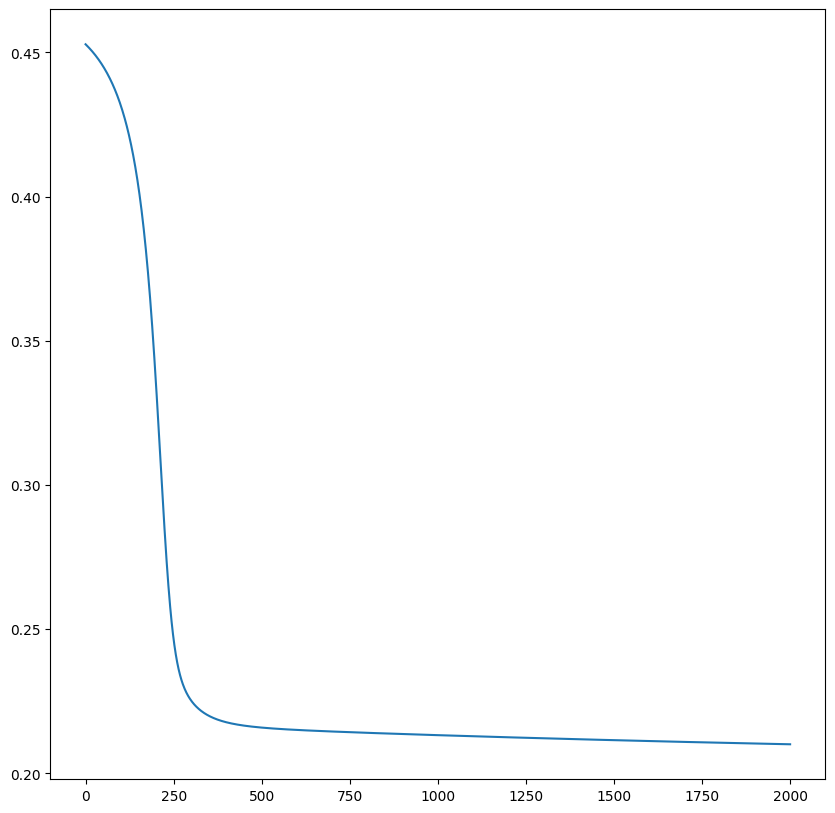

In [21]:
fig, ax = plt.subplots(1, 1, figsize= (10,10))
ax.plot(range(2000), error)
plt.show()

(e) Entregue los valores encontrados para (a2000, b2000, c2000, d2000, e2000, f2000) ∈ R6 y el valor
J(a2000, b2000, c2000, d2000, e2000, f2000).

In [22]:
print('a es : ',a , '\nb es : ',b ,'\nc es : ',c ,'\nd es : ', d, '\ne es : ', e, '\nf es : ', f)
print('\nEl valor de J() = ', error[-1])

a es :  0.34810862353865785 
b es :  0.891255216536138 
c es :  -0.8824751042080639 
d es :  2.412352558358953 
e es :  3.4006653306864987 
f es :  -1.9168365524550544

El valor de J() =  0.2100846010519945
